# 1. Import Libraries

# TITANIC DISASTER

---

# 1.Import Libraries

In [1254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import itertools
import plotly.express as px
import itertools

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingRegressor, VotingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


---

# 2. Data Visualization

Load data from the train and test CSV files.

In [1255]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


from Kaggle repository.

In [1256]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

From the local drive.

In [1257]:
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

## Data Exploration

### Training data

In [1258]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1259]:
print("Train data:", train.shape)
print("_"*100)
print("Test data:", test.shape)

Train data: (891, 12)
____________________________________________________________________________________________________
Test data: (418, 11)


In [1260]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Descriptive statistics

In [1261]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [1262]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


### Feature type

In [1263]:
print('Train data:', train.info())
print("_"*100)
print('Test data:', test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Train data: None
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non

### Observation
Features of the test data are the same as features of the training data except for the Survived feature (because it's the target).

**Features types:**
1. **Categorical:** Nominal data is classified without a natural order or rank. Ordinal data has a predetermined or natural order.
- Pclass (ordinal)
- Name (nominal)
- Sex (nominal)

2. **Numerical:** Discrete data is a numerical type of data that includes whole, concrete numbers with specific and fixed data values determined by counting. Continuous data includes complex numbers and varying data values measured over a particular time interval.
- Age (continuous)
- Fare (continuous)
- SibSp (discrete)
- Parch (discrete)

3. **Mixed:**
- Ticket (numeric and alphanumeric)
- Cabin (alphanumeric)

**Insights:** Features types are very important for EDA step.

---

# 3. Data Preprocessing

## Missing Data

In [1264]:
print('Train data:', '\n', train.isnull().sum())
print('_'*150)
print('Test data:', '\n', test.isnull().sum())

Train data: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
______________________________________________________________________________________________________________________________________________________
Test data: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<AxesSubplot:title={'center':'Test data'}>

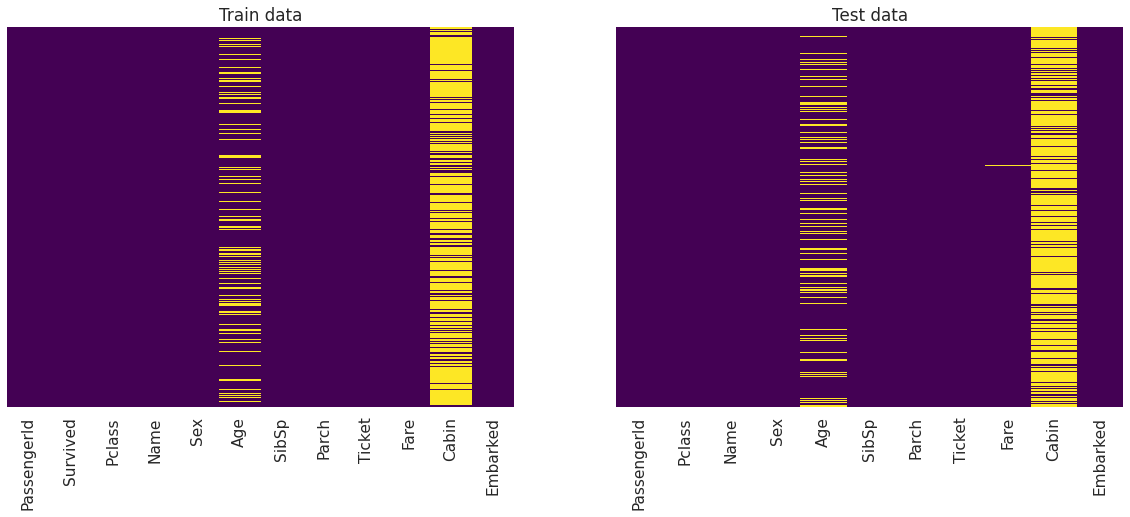

In [1265]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
plt.title('Train data')
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

plt.subplot(1,2,2)
plt.title('Test data')
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

**Insights:** Now we know what are the missed values, And we are going to discover the correlations to do what is appropriate.

In [1266]:
train_numerical_features = train.select_dtypes(exclude='object')
train_categorical_features = train.select_dtypes(include='object')

print("Numerical features:", train_numerical_features.columns) 
print('_'*150)
print("Categorical features:", train_categorical_features.columns)

Numerical features: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
______________________________________________________________________________________________________________________________________________________
Categorical features: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


### Numerical distribution

<AxesSubplot:title={'center':'Test data'}, xlabel='Age', ylabel='Count'>

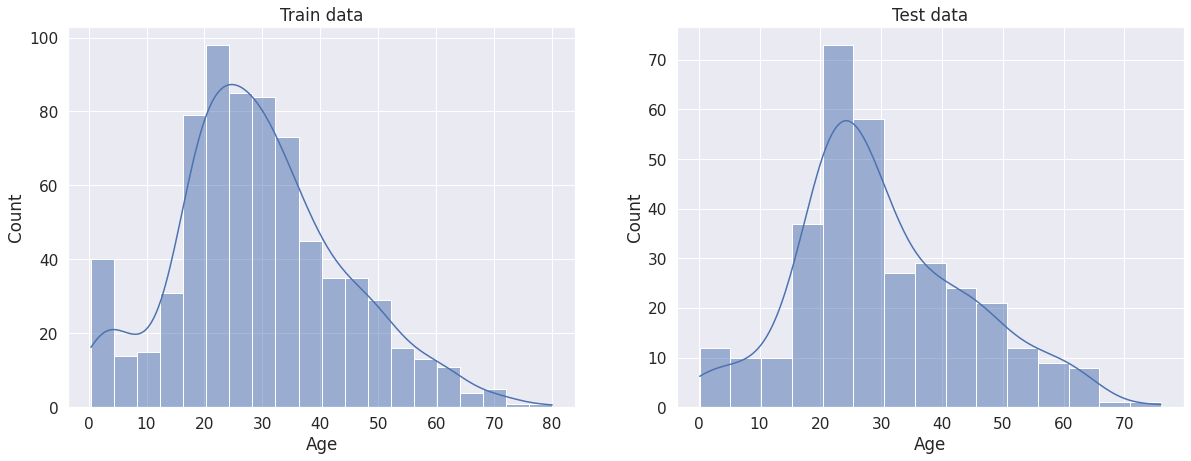

In [1267]:
plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
plt.title('Train data')
sns.histplot(x='Age', kde=True, data=train)

plt.subplot(1,2,2)
plt.title('Test data')
sns.histplot(x='Age', kde=True, data=test)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

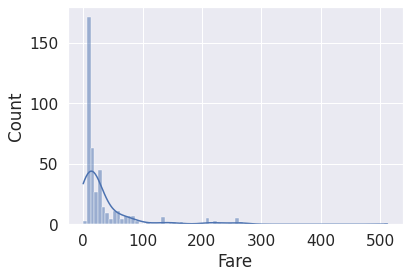

In [1268]:
sns.histplot(x='Fare', kde=True, data=test)

**Insights:**

Age feature has right skewness, So if we are going to fill missing values we will not use the average.

## Outliers

In [1274]:
fig=px.box(train, y='Age')
fig.show()

In [1281]:
fig=px.box(train, y='Fare')
fig.show()

In [1280]:
fig=px.box(train, y='Parch')
fig.show()

In [1278]:
fig=px.box(train, y='SibSp')
fig.show()

**Insights:** There are outliers in Fare, Age, SibSp and Parch features. This inspire us for EDA Step.

---

# 4. Exploratory Data Analysis(EDA)

In [ ]:
sns.countplot(train['Survived']).set_title("TARGET DISTRIBUTION")

train['Survived'].value_counts()

---

## Correlational Matrix

A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

In [ ]:
corr = train.corr()
fig = px.imshow(corr, text_auto = True, aspect = 'auto')
fig.show()

---

---

### Pclass distribution

Pclass contains the data on ticket class whereby **1- first class, 2- second class, 3- third class**.

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=train)

print(train['Pclass'].value_counts())

---

### Age distribution

In [ ]:
# Figure size
plt.figure(figsize=(10,4))
# Histogram
sns.histplot(data=train, x='Age', hue='Survived', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

---

### Siblings & spouse on board distribution

In [ ]:
plt.figure(figsize=(10, 5))

sns.set_style('whitegrid')
sns.countplot(x='SibSp',hue='Survived',data=train)

---

### Parch distribution

In [ ]:
plt.figure(figsize=(10, 5))

sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Survived',data=train) #parent and children on board

---

### Sex distribution

In [ ]:
sns.countplot(x='Sex', hue='Survived', data= train)

### Embarked distribution

In [ ]:
train['Embarked'].value_counts()

sns.countplot(x='Survived',hue='Embarked',data=train) #c-cherbourg, Q-queentown, S-southampton

---

---

### Converting Embarked to numerical

In [ ]:
train['Embarked']=train['Embarked'].replace(['C','S','Q'],[1,2,3]) #c-cherbourg, Q-queentown, S-southampton
test['Embarked']=test['Embarked'].replace(['C','S','Q'],[1,2,3])

### Converting Sex to numerical

In [ ]:
train['Sex']=train['Sex'].replace(['female','male'],[0,1])

test['Sex']=test['Sex'].replace(['female','male'],[0,1])
test.head()

---

# Feature Engineering

## Age band

In [ ]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

## Fare band

In [ ]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

In [ ]:
 train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
train.head()

# Model Building

# Evaluation